**Important Dependancies**

In [3]:
import keras
import pandas as pd
import numpy as np
from PIL import Image
import PIL
from tqdm import tqdm
import matplotlib.pyplot as plt

**Data**

In [5]:
import os
# Getting Labeled Data 
path_to_csv_data = "../input/histopathologic-cancer-detection/train_labels.csv"
df = pd.read_csv(path_to_csv_data)
df = df[:100000]

# Breaking it up into labels and images
id_of_images = df["id"]
label_of_images = df["label"]

In [17]:
# Creating x_train tensor of images (input data)
X_Train = []
for i in tqdm(id_of_images):
    id_image = i + ".tif"
    image = np.asarray(PIL.Image.open("../input/histopathologic-cancer-detection/train/" + id_image).resize((45,45)))
    image = image / 256
    X_Train.append(image)
    
X_Train = np.asarray(X_Train)

  5%|▌         | 5071/100000 [00:04<01:30, 1052.34it/s]


KeyboardInterrupt: 

In [ ]:
# Creating y_train tensor of labels and one hot encoding them (output data)
Y_Train = np.asarray(pd.get_dummies(label_of_images, sparse=True))

**Model Architecture**

In [ ]:
model = keras.Sequential([
#   Convolutional Layers for creating Feature Maps
    keras.layers.Conv2D(128,4,input_shape=(45,45,3)),
    keras.layers.BatchNormalization(),
    
#   Dropout used to prevent overfitting
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(128,3),
    keras.layers.Dropout(0.3),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,5),
    keras.layers.MaxPool2D(),
                         
    keras.layers.Flatten(),
    
#   Dense layers to make final prediction
    keras.layers.Dense(10000),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1000),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(200),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50),
    keras.layers.Dropout(0.3),
    
#   Final prediction (0 = No cancer; 1 = Cancer)
    keras.layers.Dense(2,activation="softmax")
])

In [ ]:
# Visualizing Model Weights and Parameters
model.summary()

In [ ]:
# Compiling Model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

**Training**

In [ ]:
# Training model over 10 epochs and taking the best validation accuracy
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model_cancer.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model.fit(X_Train,Y_Train,epochs=10,batch_size=100,validation_split=0.2,shuffle=True,callbacks=[checkpoint])

**Testing**

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [4]:
cancer_detection_model = keras.models.load_model("../input/weights-for-cancer-detection/model_cancer.hdf5")

No Cancer Detected. Confidence is: 85.38612723350525%
True answer is: No Cancer


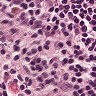

In [83]:
#Taking a random image from test set and predicting it
random_seed = np.random.randint(100000)
id_of_image = df["id"][random_seed]
label_of_image = df["label"][random_seed]

image = Image.open("../input/histopathologic-cancer-detection/train/" + id_of_image + ".tif")
image_for_pred = np.asarray(image.resize((45,45)))
image_for_pred = np.reshape(image_for_pred,(1,45,45,3))
image_for_pred = image_for_pred / 256
prediction = cancer_detection_model.predict(image_for_pred)
a = np.argmax(prediction)
b = np.amax(prediction)

if (a == 0):
    print("No Cancer Detected. Confidence is: " + str(b*100) + "%")
    if (label_of_image == 0):
        print("True answer is: No Cancer")
    else:
        print("True answer is: Cancer is there")
else:
    print("Cancer Detected. Confidence is: " + str(b*100) + "%")
    if (label_of_image == 0):
        print("True answer is: No Cancer")
    else:
        print("True answer is: Cancer is there")
image